In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re


In [280]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
sns.set_context("poster")


In [281]:
path = "results/linear_multi"
# path = "results/nonlinear_multi"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/linear_multi\\linear_dgp_13.csv', 'results/linear_multi\\linear_dgp_14.csv', 'results/linear_multi\\linear_dgp_15.csv', 'results/linear_multi\\linear_dgp_19.csv', 'results/linear_multi\\linear_dgp_2.csv', 'results/linear_multi\\linear_dgp_20.csv', 'results/linear_multi\\linear_dgp_27.csv', 'results/linear_multi\\linear_dgp_3.csv', 'results/linear_multi\\linear_dgp_4.csv', 'results/linear_multi\\linear_dgp_6.csv', 'results/linear_multi\\linear_dgp_9.csv']


In [282]:
extracted_numbers = [re.findall(r'\d+', s) for s in all_file]
first_numbers = [int(numbers[0]) if numbers else None for numbers in extracted_numbers]
first_numbers.sort()
first_numbers

[2, 3, 4, 6, 9, 13, 14, 15, 19, 20, 27]

In [4]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df)

       idx      mean  median   true   bias    std   RMSE    MAE   MAPE   q025  \
0      1.0  4.929000   4.928  4.962 -0.033  0.073  0.080  0.064  0.013  4.785   
1      1.0  4.938000   4.939  4.962 -0.024  0.082  0.085  0.068  0.014  4.779   
2      1.0  6.045000   6.044  6.051 -0.006  0.089  0.089  0.071  0.012  5.868   
3      1.0  5.968000   5.972  6.051 -0.083  0.106  0.134  0.107  0.018  5.743   
4      1.0  3.785000   3.786  4.962 -1.177  0.105  1.182  1.177  0.237  3.579   
..     ...       ...     ...    ...    ...    ...    ...    ...    ...    ...   
155  306.0  5.137000   5.147  5.700 -0.563  0.191  0.594  0.562  0.099  4.740   
156  306.0  4.737000   4.738  4.746 -0.009  0.087  0.088  0.070  0.015  4.565   
157  306.0  4.750000   4.746  4.746  0.004  0.118  0.118  0.094  0.020  4.525   
158  306.0  5.629000   5.630  5.700 -0.071  0.109  0.130  0.104  0.018  5.412   
159  306.0  5.566001   5.562  5.700 -0.134  0.170  0.216  0.176  0.031  5.236   

      q975  covering       

In [5]:
combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']] = combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']].apply(pd.to_numeric, errors='coerce')

In [6]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [7]:
def coverage_perc(x):
    return np.mean(x)*100

# df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {'mean' : ['mean'],
                                         'median' : ['mean'],
                                         'std' : ['mean'],
                                         'bias' : ['mean'],
                                         'true' : ['mean'],
                                         'RMSE' : ['mean'],
                                         'MAE' : ['mean'],
                                         'MAPE' : ['mean'],
                                         'q025' : ['mean'],
                                         'q975' : ['mean'],
                                         'ci_length' : ['mean'],
                                         'covering' : [coverage_perc]}).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary


,estimand,model,type,mean,median,std,bias,true,RMSE,MAE,MAPE,q025,q975,ci_length,covering
,,,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,coverage_perc
0,dynamic,GP,1S,4.894727,4.894984,0.098940,-0.068497,4.980902,0.145268,0.122377,0.024617,4.699317,5.088831,0.389514,91.256831
1,dynamic,GP,3S,4.664973,4.666956,0.119377,-0.298251,4.980902,0.323929,0.301295,0.060410,4.425738,4.893273,0.467536,21.857923
2,dynamic,GP,Obs.,4.098650,4.098596,0.094765,-0.864574,4.980902,0.870169,0.864612,0.173929,3.913202,4.284607,0.371404,0.000000
3,dynamic,GP,Oracle,4.921022,4.921399,0.079169,-0.042202,4.980902,0.105639,0.087486,0.017661,4.764678,5.075290,0.310612,96.174863
4,dynamic,Linear,1S,4.964252,4.964339,0.080120,0.001027,4.980902,0.107836,0.089781,0.018120,4.806727,5.121170,0.314443,95.081967
5,dynamic,Linear,3S,4.844399,4.844749,0.100049,-0.118825,4.980902,0.167836,0.144803,0.029082,4.648208,5.040301,0.392093,83.060109
6,dynamic,Linear,Obs.,4.114405,4.114000,0.094705,-0.848820,4.980902,0.854377,0.848852,0.170885,3.928809,4.301077,0.372268,0.000000
7,dynamic,Linear,Oracle,4.963290,4.963454,0.071366,0.000066,4.980902,0.087016,0.071022,0.014301,4.822825,5.103115,0.280290,98.360656
8,stoch,GP,1S,5.639836,5.643519,0.137153,-0.147541,5.789732,0.220967,0.187907,0.032421,5.356525,5.901487,0.544962,85.245902


Text(0, 0.5, '')

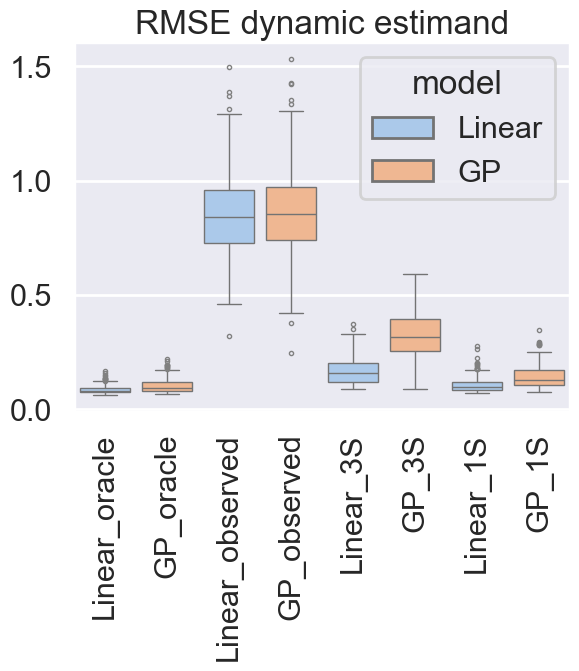

In [115]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "model", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0, 0.5, '')

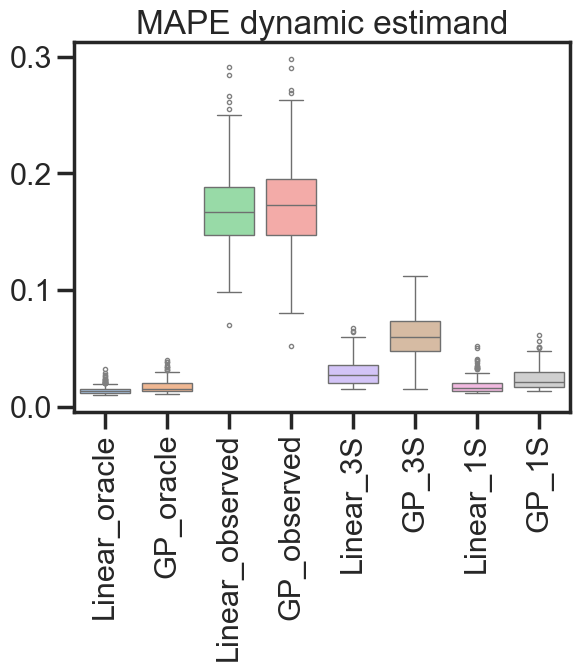

In [10]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'MAPE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

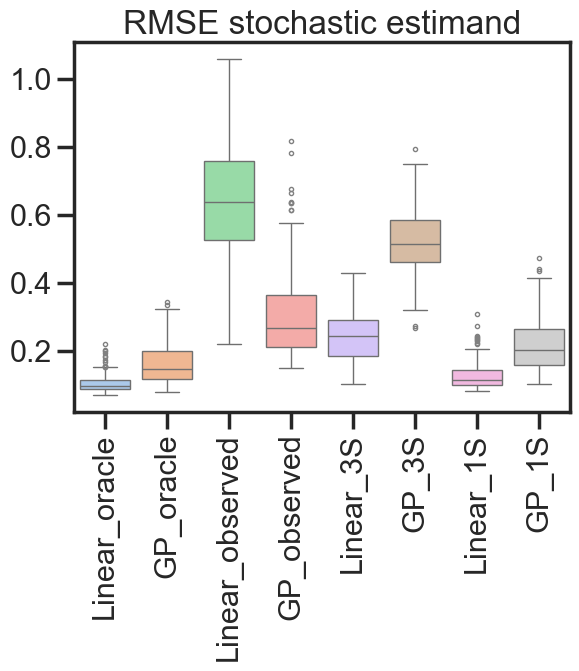

In [11]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE stochastic estimand")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

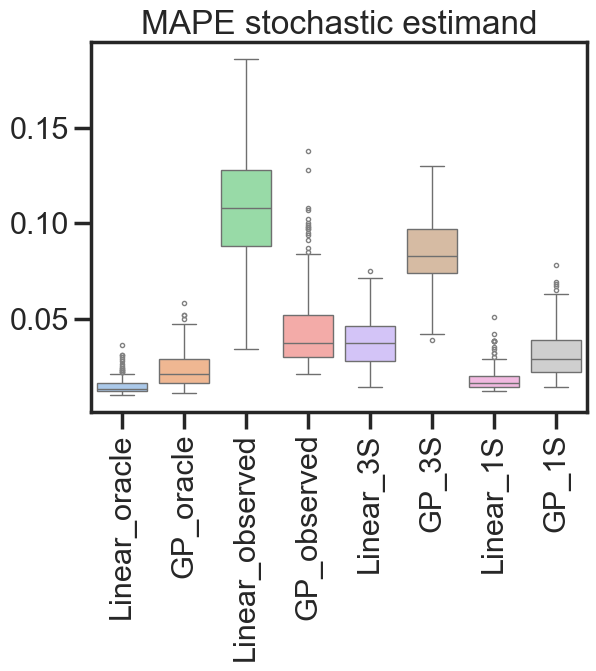

In [12]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'MAPE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE stochastic estimand")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

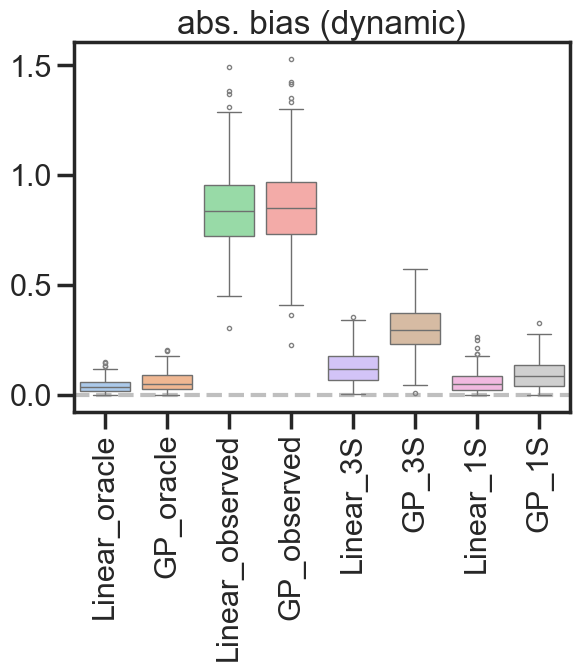

In [13]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (dynamic)")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

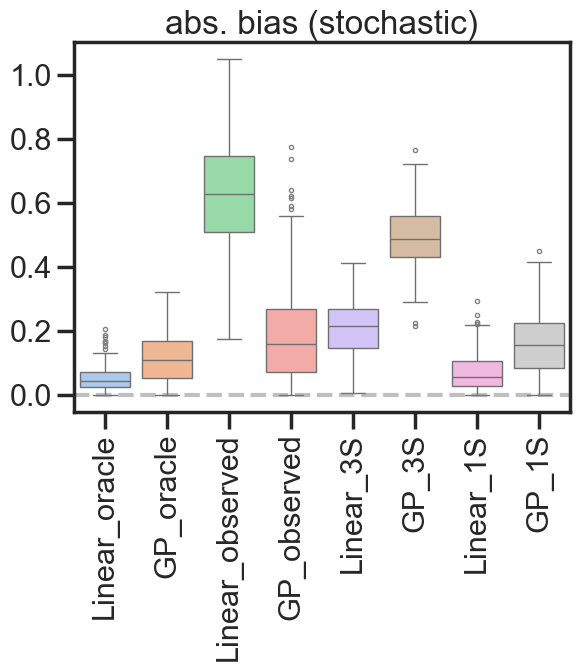

In [14]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (stochastic)")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

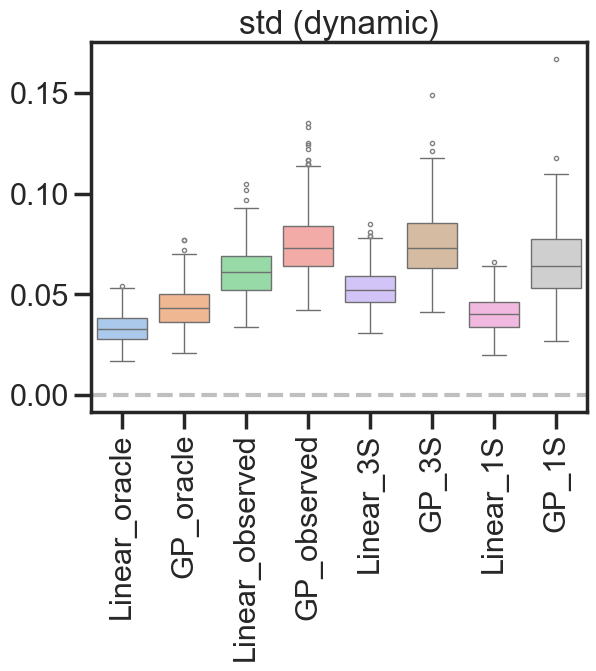

In [19]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (dynamic)")
# plt.ylim(0,.2)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

Text(0, 0.5, '')

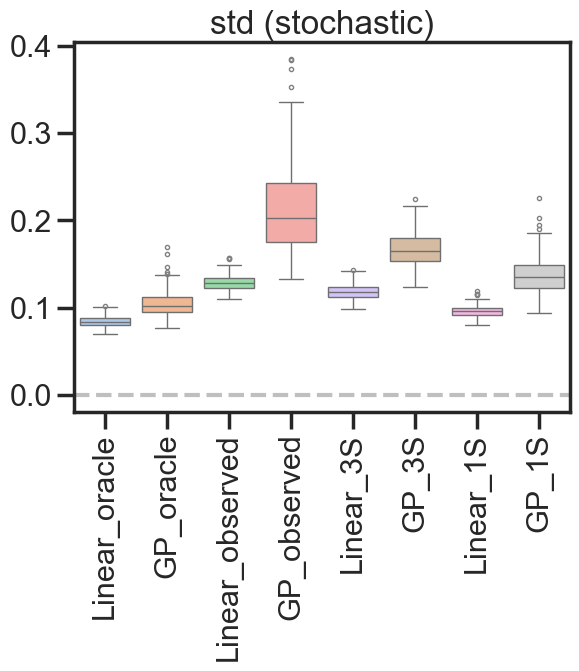

In [15]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (stochastic)")
# plt.ylim(0,.1)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

In [266]:
def format_percentage(value):
    return f"{value:.1f}%"

df_summary_dynamic = df_summary[df_summary["estimand"]=="dynamic"]
df_summary_dynamic.columns = df_summary_dynamic.columns.droplevel(1)
df_summary_dynamic["coverage"] = df_summary_dynamic["covering"].apply(format_percentage)
print(df_summary_dynamic)

combined_df_dynamic = combined_df[combined_df["estimand"]=="dynamic"]
# print(combined_df_dynamic)

  estimand   model    type      mean    median       std      bias      true  \
0  dynamic      GP      1S  4.894727  4.894984  0.098940 -0.068497  4.980902   
1  dynamic      GP      3S  4.664973  4.666956  0.119377 -0.298251  4.980902   
2  dynamic      GP    Obs.  4.098650  4.098596  0.094765 -0.864574  4.980902   
3  dynamic      GP  Oracle  4.921022  4.921399  0.079169 -0.042202  4.980902   
4  dynamic  Linear      1S  4.964252  4.964339  0.080120  0.001027  4.980902   
5  dynamic  Linear      3S  4.844399  4.844749  0.100049 -0.118825  4.980902   
6  dynamic  Linear    Obs.  4.114405  4.114000  0.094705 -0.848820  4.980902   
7  dynamic  Linear  Oracle  4.963290  4.963454  0.071366  0.000066  4.980902   

       RMSE       MAE      MAPE      q025      q975  ci_length   covering  \
0  0.145268  0.122377  0.024617  4.699317  5.088831   0.389514  91.256831   
1  0.323929  0.301295  0.060410  4.425738  4.893273   0.467536  21.857923   
2  0.870169  0.864612  0.173929  3.913202  4.284

C:\Users\bar21\AppData\Local\Temp\ipykernel_10808\2409056055.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic["coverage"] = df_summary_dynamic["covering"].apply(format_percentage)


In [267]:
df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)

print(df_summary_dynamic)


  estimand   model    type      mean    median       std      bias      true  \
0  dynamic      GP      1S  4.894727  4.894984  0.098940 -0.068497  4.980902   
1  dynamic      GP      3S  4.664973  4.666956  0.119377 -0.298251  4.980902   
2  dynamic      GP    Obs.  4.098650  4.098596  0.094765 -0.864574  4.980902   
3  dynamic      GP  Oracle  4.921022  4.921399  0.079169 -0.042202  4.980902   
4  dynamic  Linear      1S  4.964252  4.964339  0.080120  0.001027  4.980902   
5  dynamic  Linear      3S  4.844399  4.844749  0.100049 -0.118825  4.980902   
6  dynamic  Linear    Obs.  4.114405  4.114000  0.094705 -0.848820  4.980902   
7  dynamic  Linear  Oracle  4.963290  4.963454  0.071366  0.000066  4.980902   

       RMSE       MAE      MAPE      q025      q975  ci_length   covering  \
0  0.145268  0.122377  0.024617  4.699317  5.088831   0.389514  91.256831   
1  0.323929  0.301295  0.060410  4.425738  4.893273   0.467536  21.857923   
2  0.870169  0.864612  0.173929  3.913202  4.284

C:\Users\bar21\AppData\Local\Temp\ipykernel_10808\2384414092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)


In [174]:
df_summary_dynamic["true"][0]

4.980902154901961

C:\Users\bar21\AppData\Local\Temp\ipykernel_10808\1133035489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)


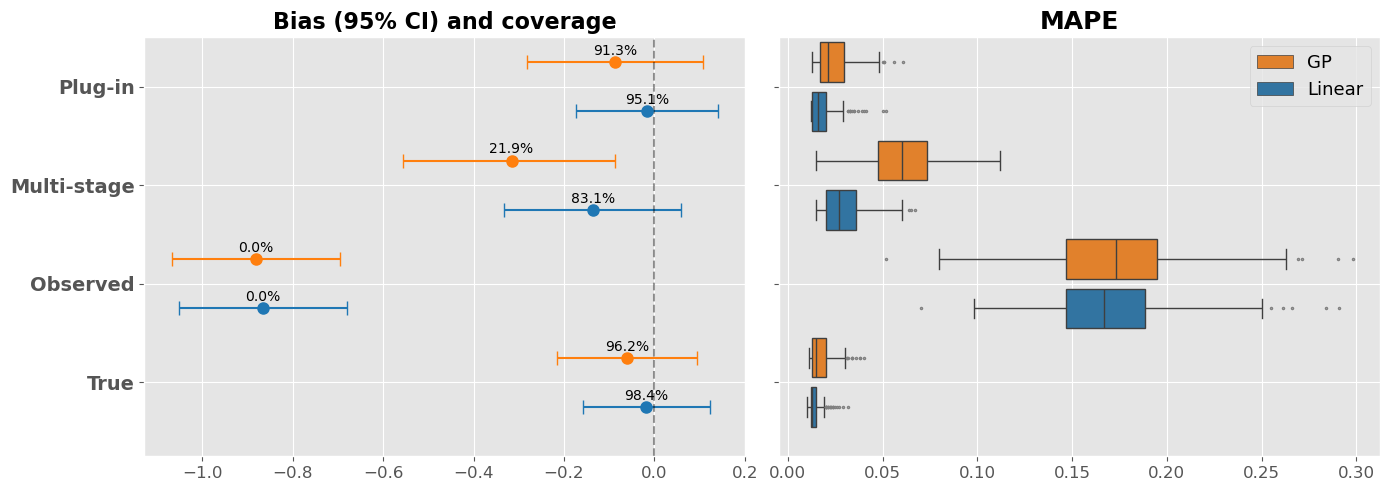

In [278]:
# Plot points with error bars
categories = np.arange(len(df_summary_dynamic['model_type']))
category_labels = df_summary_dynamic['model_type'].unique()

# Create a dictionary to map category positions

# Map categ to positions
model_names = ['True', 'Observed', 'Multi-stage', 'Plug-in']
model_order = ['Linear_Oracle', 'GP_Oracle', 'Linear_Obs.', 'GP_Obs.',
               'Linear_3S', 'GP_3S', 'Linear_1S', 'GP_1S']
categ_pos = {category: pos for pos, category in enumerate(model_order)}
df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)
# combined_df_dynamic['categ_pos'] = combined_df_dynamic['model_type'].map(categ_pos)

# Assign colors to categ2
unique_categ2 = df_summary_dynamic['model']
# colors = plt.cm.tab10(np.linspace(0, 1, len(unique_categ2)))
color_map = { "GP" : "tab:orange", "Linear" : "tab:blue"}
# color_map = dict(zip(unique_categ2, colors))

# Plotting
plt.style.use('seaborn-v0_8-colorblind')

fig, axs = plt.subplots(1, 2, figsize=(14, 5),
                        gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
# for ax in axs:
#     ax.set_facecolor('white')
# Plot points with different colors based on categ2
for categ2 in unique_categ2:
    subset = df_summary_dynamic[df_summary_dynamic['type'] == categ2]
    axs[0].scatter(subset['mean'],
                subset['categ_pos'],
                label=f'{categ2}', color=color_map[categ2], s=650)


for i, row in df_summary_dynamic.iterrows():
    axs[0].errorbar(
        row['mean'] - row['true'], 
        row['categ_pos'], 
        xerr=[[row['mean'] - row['q025']],
              [row['q975'] - row['mean']]], 
        fmt='o', 
        # color='black', 
        color = color_map[row['model']], 
        ecolor = color_map[row['model']], 
        # ecolor='black', 
        capsize=5, markersize = 8   
    )
    
    axs[0].annotate(row['coverage'], 
                    xy=(row['mean'] - row['true'], row['categ_pos']), 
                    xytext=(0, 13), 
                    textcoords='offset points', 
                    ha='center', 
                    va='top',
                    fontsize=10, 
                    color='black')    

# Customize the x-axis to show category labels
axs[0].set_yticks(np.arange(0.5,len(model_order),2))
# axs[0].set_yticklabels(model_order)
axs[0].set_yticklabels(model_names, fontsize=14, fontweight='bold')
axs[0].set_ylim(-1, len(model_order) - 0.5)
# axs[0].axvline(df_summary_dynamic["true"][0], color='grey', linestyle='--', alpha=0.5)
axs[0].axvline(0, color='black', linestyle='--', alpha=0.4)
axs[0].set_title('Bias (95% CI) and coverage', fontsize=16, fontweight='bold')
axs[0].grid(True)


flierprops = dict(marker='.', markerfacecolor='None', markersize=3,  markeredgecolor='grey')
sns.boxplot(
    data=combined_df_dynamic, 
    x='MAPE', 
    y='method', 
    hue="model", 
    palette=color_map, 
    ax=axs[1],
    flierprops=flierprops
)

axs[1].set_yticks(np.arange(0.5,len(model_order),2))
axs[1].set_ylim(-1, len(model_order) - 0.5)
# axs[1].set_yticklabels([])
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_title('MAPE', fontsize=18, fontweight='bold')
handles, labels = axs[1].get_legend_handles_labels()
ordered_handles = [handles[1], handles[0]]  # Reorder legend
ordered_labels = [labels[1], labels[0]]  # Reorder labels
axs[1].legend(ordered_handles, ordered_labels, title='', loc='upper right', 
              fontsize=13)
axs[1].grid(True)
plt.tight_layout()
# plt.style.use('seaborn-whitegrid')
axs[0].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='x', labelsize=12)


plt.savefig('results/figs/scatter_and_boxplot.png', dpi = 1000)           # Save as PNG file
plt.show()
